In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
pd.set_option('display.max_columns', None) #shows all columns on dataframe

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #applied to every df in this notebook

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,NONE,Average,7 Average,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,NO,NONE,Average,7 Average,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,NO,NONE,Average,8 Good,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,NO,NONE,Average,8 Good,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,NO,NONE,Average,8 Good,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,NO,NONE,Average,7 Average,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,NONE,Average,8 Good,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#the target would be price
#get rid of lat, long, id, condition for now 

#yr_renovate - potenital drop those na for the main analysis and come back to it to see if there is a differenc subset

#if we end up using date, change to date-time-series

#interested columns
- sqft_living15
- sqft_lot15
- grade #need to parse out since categorical 

In [7]:
df['condition'].value_counts()
#difficult to make reccomendation base off of this since there's a lot of ways to define these terms
#use grade which is a little less vague

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [8]:
df['yr_renovated'].value_counts()
#dropping columns base on the number of zeros
#potentially compared the zeros to the those that have ben renovated to see if there is a significant difference

0.000       17011
2014.000       73
2003.000       31
2013.000       31
2007.000       30
            ...  
1946.000        1
1959.000        1
1971.000        1
1951.000        1
1954.000        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
numbers = df.select_dtypes(np.number)

In [10]:
numbers

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,1180,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,2170,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,770,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,1050,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,1680,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.000,3,2.500,1530,1131,3.000,1530,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,400000.000,4,2.500,2310,5813,2.000,2310,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,402101.000,2,0.750,1020,1350,2.000,1020,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,400000.000,3,2.500,1600,2388,2.000,1600,2004,0.000,98027,47.535,-122.069,1410,1287


In [11]:
df_2 = numbers.drop(['id', 'lat', 'long', 'zipcode'], axis = 1)

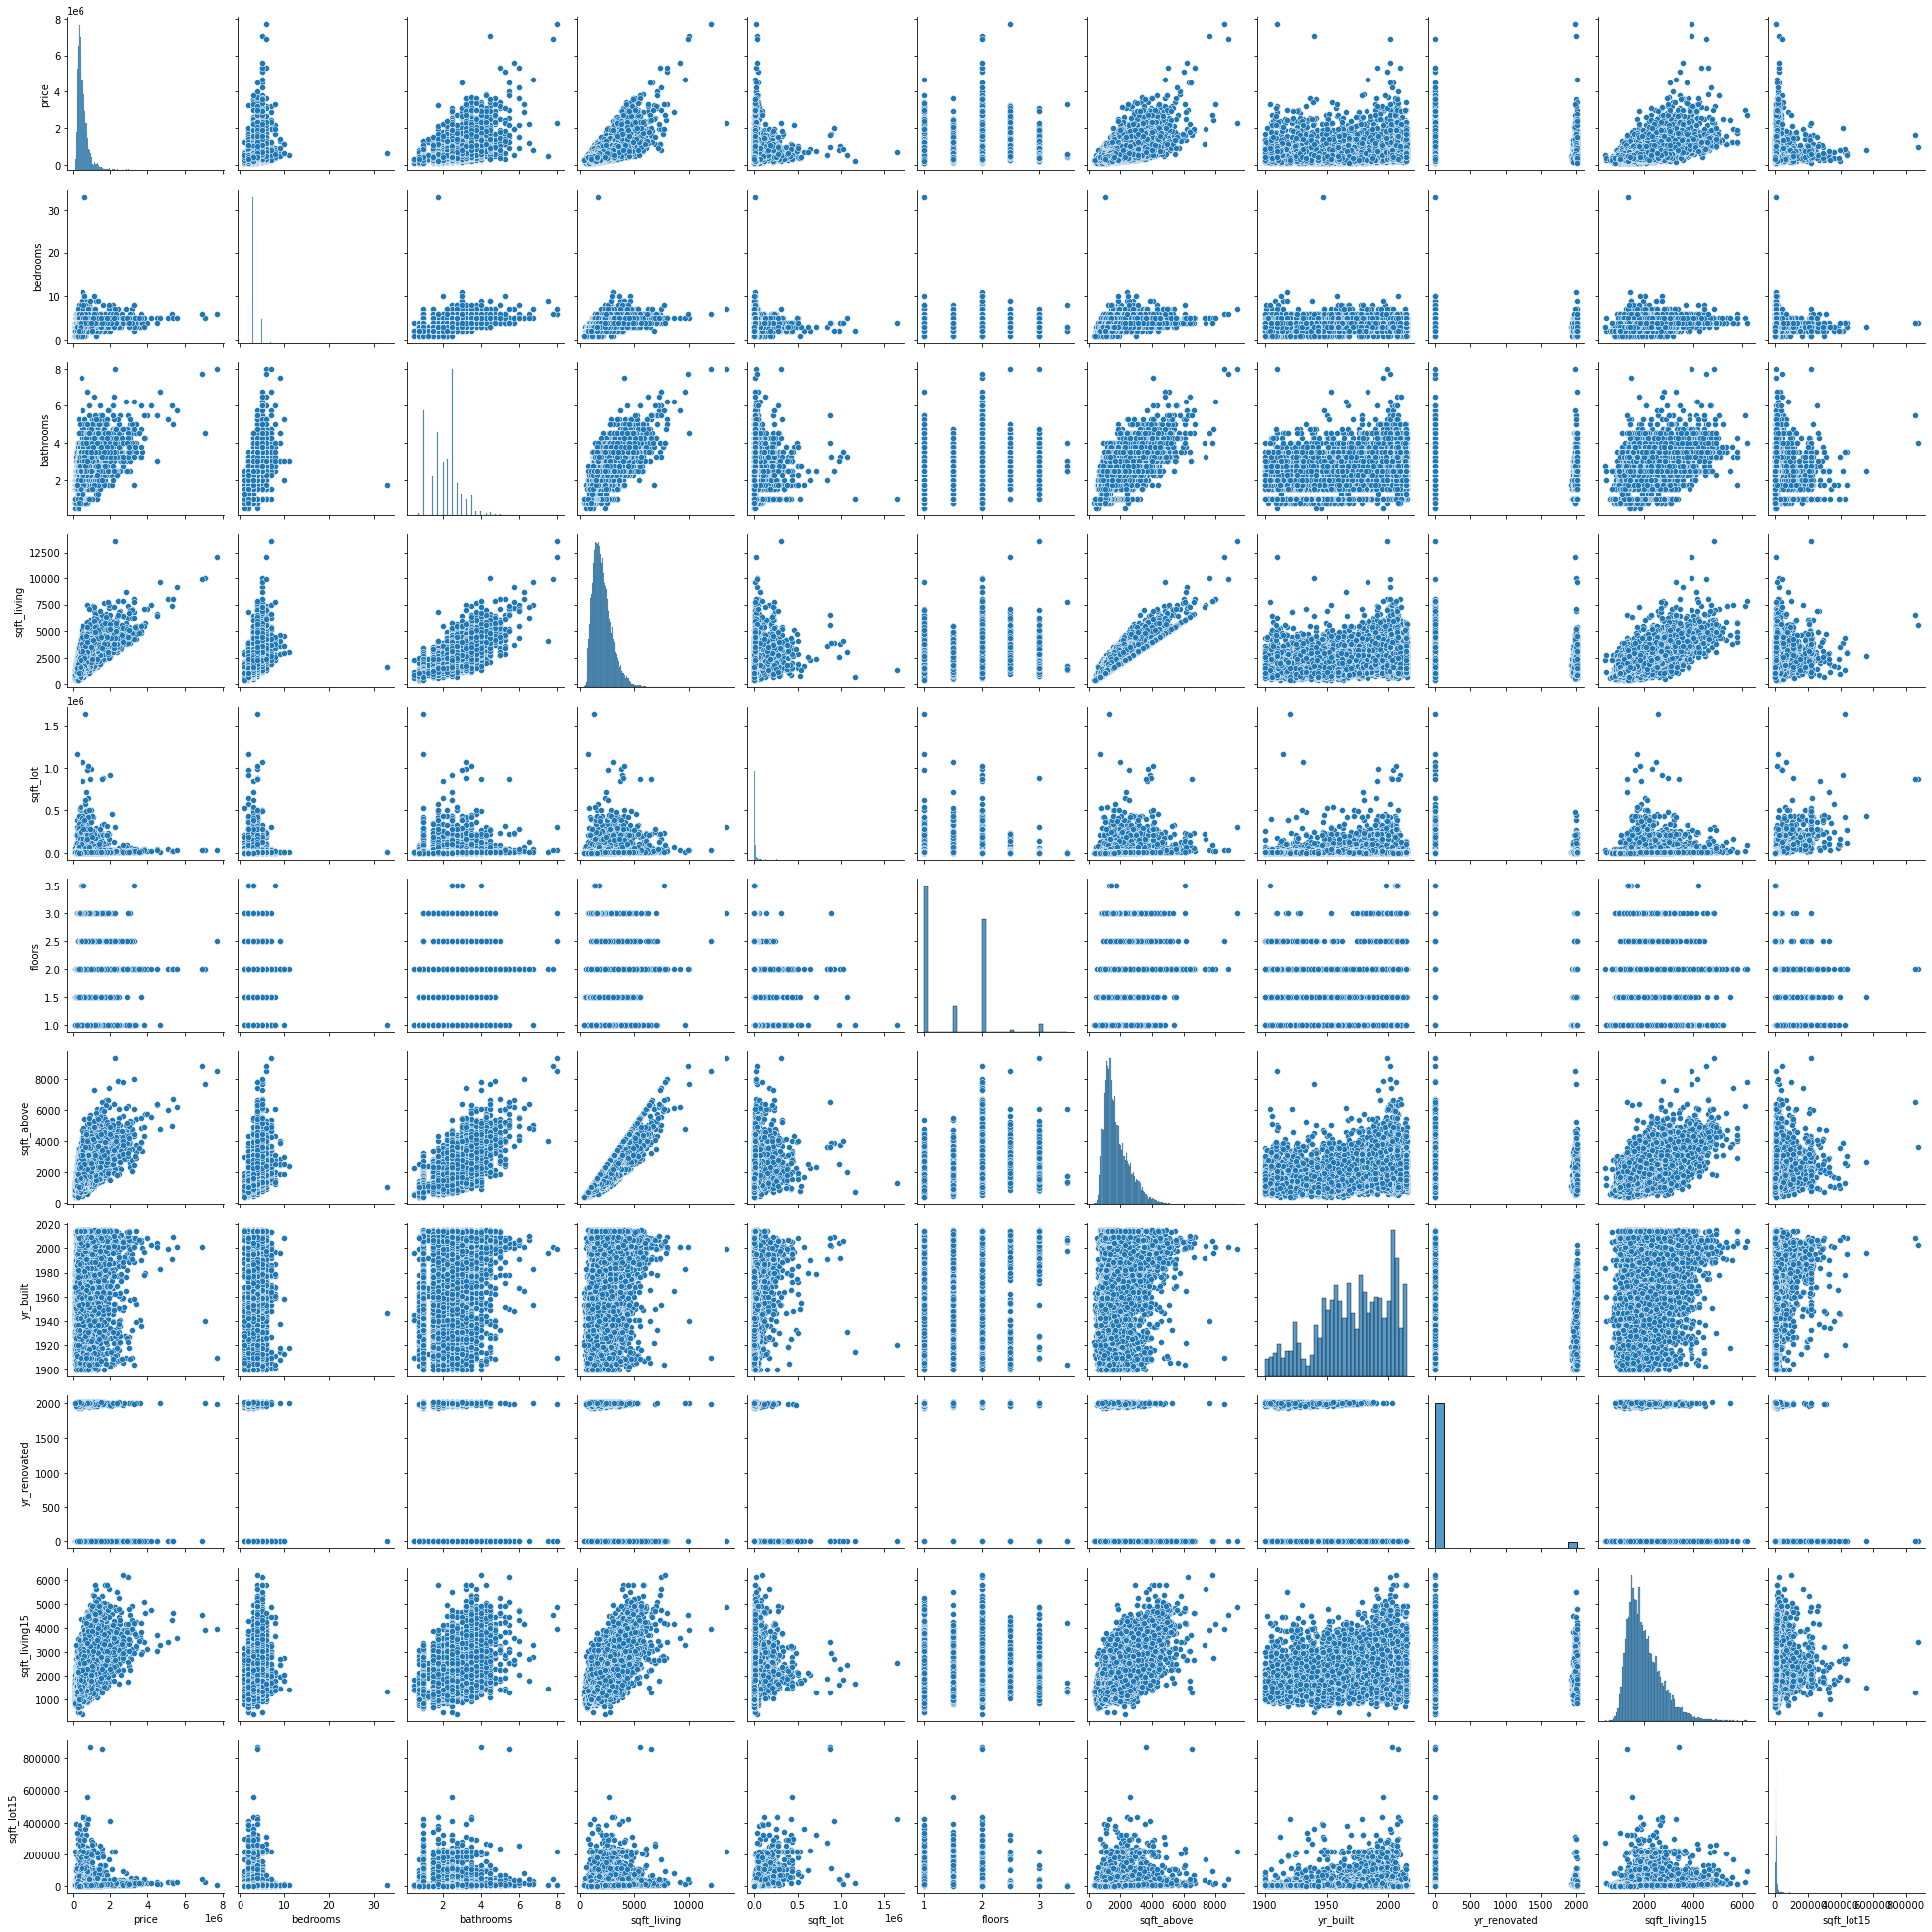

In [12]:
#picture = sns.pairplot(df_2)

<ipython-input-13-e71255978ee3>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('heat.png',bbox = 'tight')


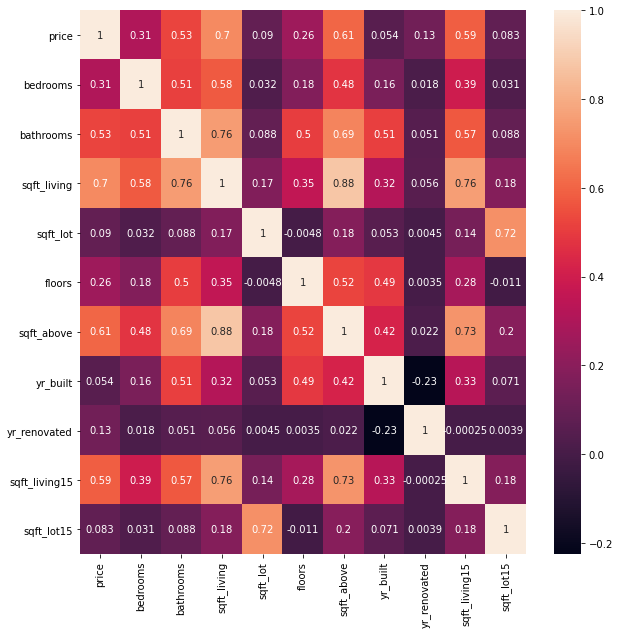

In [13]:
#fig, ax = plt.subplots(figsize=(10,10))
#heat = sns.heatmap(df_2.corr(), annot = True)
#plt.savefig('heat.png',bbox = 'tight')

In [14]:
#sqft_living has a corr of .7
#bathroom .53
# sqft_above .61
#sqft_living15 .59
#sqft_living and sqft_above have high correlation to each other .88
#sqft_living and sqft_living_living15 has high correlation .76
#sqft_living and bedrooms has .58
#sqft_living and bathroom has a correlation of .76 - multicolinearity issue?
#potentially turn sqft_living into a boolean and compare it to the sqft_living15 to see how it compares

In [15]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [16]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [18]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,NONE,Average,7 Average,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,NO,NONE,Average,7 Average,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,NO,NONE,Average,8 Good,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,NO,NONE,Average,7 Average,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,NO,NaN,Average,7 Average,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,NO,NONE,Average,7 Average,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,NO,NONE,Average,7 Average,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [19]:
df.groupby('view').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
view,,,,,,,,,,,,,,,
AVERAGE,4780385284.147,791390.371,3.567,2.427,2650.720,22317.004,1.514,2082.936,1964.817,128.412,98090.940,47.563,-122.240,2427.345,17355.149
EXCELLENT,4998184382.953,1452465.883,3.625,2.782,3334.479,21624.013,1.606,2508.685,1965.950,329.412,98095.864,47.576,-122.263,2841.000,18881.069
FAIR,4617411098.379,813373.267,3.536,2.350,2571.045,12370.597,1.392,1935.739,1962.891,180.022,98096.394,47.580,-122.286,2407.345,10759.700
GOOD,4340826541.945,973285.197,3.671,2.670,3016.846,34877.126,1.565,2277.030,1967.390,242.759,98092.065,47.548,-122.243,2702.209,23922.736
NONE,4571527549.821,496806.066,3.349,2.071,1998.365,14156.567,1.491,1747.021,1971.622,71.871,98076.323,47.560,-122.210,1924.738,12165.797


In [20]:
#visually the price of average, fair and good look the about the same so we would need to run a significant test to see
#excellent and none looks to be potentially significant
#use of anova here to see and ad-hoc tests

In [21]:
#drop nulls from views
df_drop_views = df.dropna(subset = ['view'])
df_drop_views

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,NONE,Average,7 Average,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,NO,NONE,Average,7 Average,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,NO,NONE,Average,8 Good,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,NO,NONE,Average,8 Good,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,NO,NONE,Average,8 Good,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,NO,NONE,Average,7 Average,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,NONE,Average,8 Good,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287


In [22]:
df.yr_renovated.value_counts()

0.000       17011
2014.000       73
2003.000       31
2013.000       31
2007.000       30
            ...  
1946.000        1
1959.000        1
1971.000        1
1951.000        1
1954.000        1
Name: yr_renovated, Length: 70, dtype: int64

In [23]:
df.yr_renovated.isna().sum()

3842

In [24]:
df.yr_renovated.fillna(value = 0, inplace = True)
#fill them with zero, might be mention in the next step to look at
#for now we can drop 

In [25]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,NONE,Average,7 Average,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650


In [28]:
df[['bathrooms']].head(20).value_counts()

bathrooms
1.000        8
2.000        3
3.000        2
2.500        2
2.250        2
4.500        1
1.750        1
1.500        1
dtype: int64

In [31]:
df.shape

(21597, 21)

In [29]:
len(numbers['id'].unique())

21420

In [34]:
copy_df = df.copy()

In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,NONE,Average,7 Average,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,NO,NONE,Average,7 Average,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,NO,NONE,Average,6 Low Average,770,0.0,1933,0.000,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,NO,NONE,Average,8 Good,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [36]:
trial = copy_df.groupby(['id']).date.transform(max)
trial_cleaned = copy_df[copy_df.id == trial]

In [50]:
#making the categorical variable
cate_column = df_drop_views[['grade', 'view']]

In [51]:
#ohe = OneHotEncoder(drop='first')

#columns_name2 = ['weekday', 'weathersit']
#scale_features2 = .copy()

#features2= scale_features2[columns_name2]

#scale3 = ohe.fit_transform(features2)

NameError: name 'df_cate' is not defined

In [52]:
ohe = OneHotEncoder(drop='first')

column_name = ['grade', 'view']
features = cate_column.copy()

features2 = features[column_name]

cate_ohe = ohe.fit_transform(features2)

cate_ohe

<21534x14 sparse matrix of type '<class 'numpy.float64'>'
	with 40981 stored elements in Compressed Sparse Row format>

In [53]:
name = ohe.get_feature_names()

In [54]:
cate_parsed = pd.DataFrame(cate_ohe.todense(), columns = name)

In [55]:
cate_parsed
#X0 = grade
#x1 = view

,x0_11 Excellent,x0_12 Luxury,x0_13 Mansion,x0_3 Poor,x0_4 Low,x0_5 Fair,x0_6 Low Average,x0_7 Average,x0_8 Good,x0_9 Better,x1_EXCELLENT,x1_FAIR,x1_GOOD,x1_NONE
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
2,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
21530,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
21531,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
21532,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
